In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model as LM
from sklearn.feature_selection import f_regression, r_regression
from scipy.stats import f_oneway,f
import statsmodels.api as sm

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [3]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


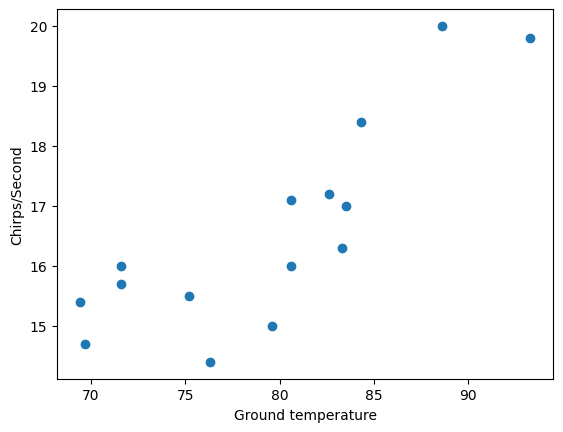

In [4]:
plt.scatter(df["Ground Temperature"],df["Chirps/Second"])
plt.xlabel("Ground temperature")
plt.ylabel("Chirps/Second")
plt.show()

In [5]:
reg = LM.LinearRegression().fit(df[["Ground Temperature"]].values, df["Chirps/Second"].values)
intra,extra=reg.predict(pd.DataFrame([18,95]).values)
print(f' The R^2 value for {reg.score(df[["Ground Temperature"]].values, df["Chirps/Second"].values)}')
print(f"The frequency of cricket at 18 temperature is {intra}")
print(f"The frequency of cricket at 95 temperature is {extra}")



 The R^2 value for 0.6922946529147004
The frequency of cricket at 18 temperature is 4.113309810574803
The frequency of cricket at 95 temperature is 19.744289128968745


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [6]:
df = pd.read_fwf("brain_body.txt")
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


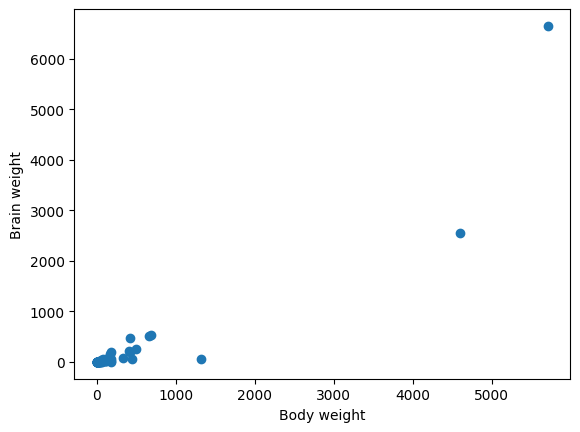

In [7]:
plt.scatter(df["Body"],df["Brain"])
plt.xlabel("Body weight")
plt.ylabel("Brain weight")

plt.show()

In [8]:
model = LM.LinearRegression().fit(df[["Body"]],df["Brain"])
print(f'R^2 = {model.score(df[["Body"]],df["Brain"])}')
print(f"The regression equation between Body weight and Brain weight is y = {model.coef_[0]}*x")

R^2 = 0.8726620843043331
The regression equation between Body weight and Brain weight is y = 0.9029129477287057*x


For every unit increase of _Body weight_ (x) there be **0.903** increase in _Brain weight_ (y). 

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [5]:
df = pd.read_fwf("salary.txt", header=None, names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [9]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [10]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


In [6]:
X = df.loc[:,:"YSdeg"]
y = df["Salary"]


In [7]:

x = sm.add_constant(X)
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     54.13
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           3.86e-18
Time:                        11:57:36   Log-Likelihood:                -474.78
No. Observations:                  52   AIC:                             961.6
Df Residuals:                      46   BIC:                             973.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.141e+04   1081.052     10.555      0.000    9234.101    1.36e+04
Sex         1241.7925    885.560      1.402      0.168    -540.747    3024.332
Rank        5586.1814    663.967      8.413      0.000    4249.685    6922.678
Year         482.8598     91.718      5.265      0.000     298.242     667.478
Degree     -1331.6441    992.854     -1.341      0.186   -3330.156     666.868
YSdeg       -128.7906     75.582     -1.704      0.095    -280.928      23.347
==============================================================================
Omnibus:                       26.336   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.754
Skew:                           1.482   Prob(JB):                     1.29e-12
Kurtosis:                       7.060   Cond. No.                         79.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Note**: Sex,Ysdeg,Degree have p value greater than 0.05. Sex is unsuitable predictive variable for salary 

In [14]:
XwithoutGender = sm.add_constant(df.loc[:,"Rank":"YSdeg"])


In [15]:
model2 = sm.OLS(y,XwithoutGender).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     65.81
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           1.15e-18
Time:                        03:45:18   Log-Likelihood:                -475.87
No. Observations:                  52   AIC:                             961.7
Df Residuals:                      47   BIC:                             971.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.184e+04   1048.003     11.294      0.000    9728.298    1.39e+04
Rank        5270.2259    630.955      8.353      0.000    4000.907    6539.544
Year         422.3945     81.777      5.165      0.000     257.880     586.909
Degree      -892.7177    951.860     -0.938      0.353   -2807.612    1022.177
YSdeg        -84.2824     69.296     -1.216      0.230    -223.687      55.122
==============================================================================
Omnibus:                       32.848   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.527
Skew:                           1.744   Prob(JB):                     5.98e-20
Kurtosis:                       8.356   Cond. No.                         79.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To conclude the there is sex is not good predictive variable for salary or no gender gap pay we can conduct hypothesis testing.

H0: Predictive power of model is not decreased removing gender.

H alternate: Predictive power of model is decreased removing gender.


F-Statistic = ((RSS1 - RSS2)/(p2 - p1))/(RSS2/(n-p2))

- RSS1 = Sum of squared residuals of model1 
- RSS2 = Sum of squared residuals of model2 
- p1 = number of features of model1
- p2 = number of features of model2 
- n = Sample size

Choosing significance level (alpha) of 0.05 if p-value of F-statistic is less than alpha we can reject the null hypothesis.

In [16]:
RSS1 = np.sum((model.predict(model.params.values) - y)**2)
RSS2 = np.sum((model2.predict(model2.params.values) - y)**2)
p1 = x.columns.__len__()
p2 = p1 - 1
n = df["Sex"].__len__()
RSS1,RSS2,p1,p2,n

(1.4146385948975951e+18, 1.4823480614580823e+18, 6, 5, 52)

Conducting left tail test because the claim is predicted power of r^2 decreased with gender

Ha: r^2 < 0.839

In [17]:
F_stat = ((RSS1 - RSS2)/(p2 - p1))/(RSS2/(n - p2))

p_value = f.sf(F_stat, np.abs(p2 - p1), n - p2)
if p_value <= 0.05: 
    print("Rejecting null hypothesis there is effect of gender at 95% confidence.")
else:
    print("Fail to Reject null hypothesis there is no effect of gender at 95% confidence.")

Fail to Reject null hypothesis there is no effect of gender at 95% confidence.


Concluding there is no effect of sex and there is gender pay - gap for given data of 52 teachers.

### Best model for predicting the model

In [90]:

def Log(name,Predictors,ResponseV,SignificantFeatures,excludeCols,skimmed,pValues,rSq,rAdjSq):
    with open(str(name),"a") as f:
        f.write(f"""
            X:{Predictors}
            Y:{ResponseV}
            Significant Features: {SignificantFeatures}
            Removed Column: {excludeCols}
            Skimmed:{skimmed}
            pValues:{pValues}
            R^2:{rSq}
            Adj R^2:{rAdjSq}
        """)


def getPValues(x,y,pValueObj = True):
    X = sm.add_constant(x)
    lr = sm.OLS(y,X).fit()
    summary_table = np.array(lr.summary().tables[1].data)
    rSquared, rAdjSquared = [float(i[-1]) for i in lr.summary().tables[0].data[:2]]
    _,secIdx = [j for i in np.where(summary_table[:1] == "P>|t|") for j in i]
    pValue = summary_table[2:,0:secIdx+1:secIdx]
    if pValueObj == False:
        return {i[0]:i[1] for i in pValue}
    return {
        "features": [i[0] for i in pValue[0:,:1]],
        "pValues": [float(i[0]) for i in pValue[0:,1:]],
        "R^2": rSquared,
        "R^2-adj":rAdjSquared 
    }

def stepWiseRegCombined(X,y,SignificanceLevel = 0.05,thresholdToStop = 2, log = False,ResponseVNameForLog = "Not Provided",withModel = False,ReadLog = True):
    name = ""

    if log == True:
        import time as t
        name = f"Forward And Backward Regression log {t.strftime('%y_%m_%d %H_%M_%S')}.txt"

    featuresName = list(X.columns)
    SignificantFeatures = []
    excludeCols = []
    Con=True
    skimmed = {i:0 for i in featuresName}
    if featuresName.__len__() == 1:
        return {
            "model": sm.OLS(y,X).fit(),
            "oneFeatureModel": featuresName
        }
    excludeCols = featuresName[:2]
    featurePValueObj = getPValues(X[excludeCols],y)
    significantPVal = [i for i in featurePValueObj["pValues"] if i < SignificanceLevel]
    if significantPVal.__len__() != 0:
        zeroIndex = featurePValueObj["pValues"].index(0)
        significantFeature = featurePValueObj["features"][zeroIndex]
        SignificantFeatures = [*SignificantFeatures,significantFeature]
        featuresName.pop(featuresName.index(significantFeature))
        excludeColIdx = 0
        if zeroIndex == 0:
            excludeColIdx = 1
        excludeCols = [featurePValueObj["features"][excludeColIdx]]
        featuresName.pop(featuresName.index(featurePValueObj["features"][excludeColIdx]))
        featuresName = [*featuresName,featurePValueObj["features"][excludeColIdx]]
        skimmed = {
            **skimmed,
            featurePValueObj["features"][excludeColIdx]:1,
        }
        del skimmed[significantFeature]
    else:
        featureLowest = featurePValueObj["features"][featurePValueObj["pValues"].index(min(featurePValueObj["pValues"]))]
        featuresName.pop(featuresName.index(featureLowest))
        featuresName = [*featuresName,featureLowest]
        excludeCols = [featureLowest]
        skimmed = {
            **skimmed,
            featurePValueObj["features"][0]:1,
            featurePValueObj["features"][1]:1
        }
    
    if log == True:
        Log(Predictors=[X.columns[:2]],ResponseV=ResponseVNameForLog,SignificantFeatures=SignificantFeatures,excludeCols=excludeCols,name=name,skimmed=skimmed,pValues=featurePValueObj["pValues"],rAdjSq=featurePValueObj["R^2-adj"],rSq=featurePValueObj["R^2"])

    while Con == True:
        colsToRemove = []
        cols = [] 
        for i in featuresName:
            if i not in excludeCols:
                cols.append(i)
            else:
                colsToRemove.append(i)
        newX = X.drop(columns=colsToRemove)
        if cols.__len__() == 0:
            break
        featurePValueObj = getPValues(newX[[*SignificantFeatures,cols[0]]],y)
        if log == True:
            Log(Predictors=[*SignificantFeatures,cols[0]],ResponseV=ResponseVNameForLog,SignificantFeatures=SignificantFeatures,excludeCols=excludeCols,name=name,skimmed=skimmed,pValues=featurePValueObj["pValues"],rAdjSq=featurePValueObj["R^2-adj"],rSq=featurePValueObj["R^2"])
        excludeCols = []
        significantPVal = [i for i in featurePValueObj["pValues"] if i < SignificanceLevel]
        if significantPVal.__len__() != 0:
            notAll0s = []
            all0IdxFeatures = []
            for ind,i in enumerate(featurePValueObj["pValues"]):
                if i < SignificanceLevel:
                    all0IdxFeatures.append(featurePValueObj["features"][ind])
                else:
                    notAll0s.append(featurePValueObj["features"][ind])
            NotAdyInSigFeatures = [i for i in all0IdxFeatures if i not in SignificantFeatures]
            SignificantFeatures = [i for i in [*SignificantFeatures,*NotAdyInSigFeatures] if i not in notAll0s]
            for i in NotAdyInSigFeatures:
                featuresName.pop(featuresName.index(i))
                del skimmed[i]
            for i in notAll0s:
                if i in featuresName: 
                    featuresName.pop(featuresName.index(i))
                    skimmed = {
                        **skimmed,
                        i:skimmed[i] + 1,
                    }
                else:
                    skimmed = {
                        **skimmed,
                        i:1,
                    }
    
                featuresName = [*featuresName,i]
                excludeCols = [i]

        else:
            featureLowest = featurePValueObj["features"][featurePValueObj["pValues"].index(min(featurePValueObj["pValues"]))]
            featuresName.pop(featuresName.index(featureLowest))
            featuresName = [*featuresName,featureLowest]
            excludeCols = [featureLowest]
        
        if SignificantFeatures.__len__() == 0:
            for i in skimmed:
                if skimmed[i] == thresholdToStop + 2:
                    Con = True
        else:
            innerCon = False
            for i in skimmed.values():
                if i < thresholdToStop:
                    innerCon = True
            Con = innerCon
    
    if ReadLog == True and log == True:
        with open(name,"r") as f:
            print(f.read())
    
    if withModel == True:
        return {
            "SignificantFeatures":SignificantFeatures,
            "modelWithSF":sm.OLS(y,sm.add_constant(X[SignificantFeatures])).fit()
        }
    else:
        return SignificantFeatures


BestModelObj = stepWiseRegCombined(X,y,log=True,ResponseVNameForLog="Salary",withModel=True,ReadLog=True)


            X:[Index(['Sex', 'Rank'], dtype='object')]
            Y:Salary
            Significant Features: ['Rank']
            Removed Column: ['Sex']
            Skimmed:{'Sex': 1, 'Year': 0, 'Degree': 0, 'YSdeg': 0}
            pValues:[0.445, 0.0]
            R^2:0.755
            Adj R^2:0.746
        
            X:['Rank', 'Year']
            Y:Salary
            Significant Features: ['Rank']
            Removed Column: ['Sex']
            Skimmed:{'Sex': 1, 'Year': 0, 'Degree': 0, 'YSdeg': 0}
            pValues:[0.0, 0.0]
            R^2:0.844
            Adj R^2:0.837
        
            X:['Rank', 'Year', 'Degree']
            Y:Salary
            Significant Features: ['Rank', 'Year']
            Removed Column: []
            Skimmed:{'Sex': 1, 'Degree': 0, 'YSdeg': 0}
            pValues:[0.0, 0.0, 0.868]
            R^2:0.844
            Adj R^2:0.834
        
            X:['Rank', 'Year', 'YSdeg']
            Y:Salary
            Significant Features: ['Rank', 'Y

From the above log out we can easy find the best features to predict the model is **Rank** and **Year**. 

It also worth noting the when X of Rank,Year and **Sex** the R^2 adj is 0.001 affected which means it does not making meaningful decrement(or improvement) to the model. 

Proving the Sex was never a reason for the pay gap. The status in hierarchy of professors (Rank) and the years in that position really have an effect in salary. Rest of those variables just causing noises.